# 1 - Introdução

A análise do arquivo Titanic buscará explorar as principais variáveis que levaram à sobrevivência dos passageiros, se características como sexo, nivel de classe, tamanho de família e valor da passagem influênciaram no resultado de sobrevivência.

# 2 - Importes, leitura e tratamento do arquivo CSV

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np
import math

#No momento do importe já determinei que valores NaN deveriam ser substituídos por ZERO 
#para evitar problema nos cálculos e dropei PassengerId e Cabin, que não irão ajudar muito.
titanic = pd.read_csv('titanic_data.csv').drop(['PassengerId', 'Cabin'], 1)

In [142]:
#Adicionei uma coluna para facilitar a contagem de cada indivíduo.
titanic['Count'] = 1

titanic.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1


In [264]:
titanic[titanic['Fare'] == 0 ].groupby('Ticket').sum()

,Survived,Pclass,Age,SibSp,Parch,Fare,Count
Ticket,,,,,,,
112050,0,1,39.0,0,0,0.0,1
112052,0,1,NaN,0,0,0.0,1
112058,0,1,NaN,0,0,0.0,1
112059,0,1,40.0,0,0,0.0,1
19972,0,1,38.0,0,0,0.0,1
239853,0,6,NaN,0,0,0.0,3
239854,0,2,NaN,0,0,0.0,1
239855,0,2,NaN,0,0,0.0,1
239856,0,2,NaN,0,0,0.0,1


In [252]:
#Procurando por valores NaN na coluna Age.
d = titanic[pd.isnull(titanic['Age'])].groupby(['Sex', 'Pclass'])
f = titanic.groupby(['Sex', 'Pclass']).mean().loc[('female', 1)]['Age']
#f
#titanic_female_age = 
#Formula para substituir idades NaN pela média do respecito grupo de Sex e Pclass.
#def filling_age(df):
#    for i in range(titanic.count()['Count']):
#            if np.isnan(df['Age']).values[i]:
#                df['Age'] = df.groupby(['Sex','Pclass']).mean().loc[(df['Sex'], df['Pclass'])]['Age']

#z = titanic['Age'].apply(filling_age)
#z
#for i in range(titanic.count()['Count']):
#    print np.isnan(titanic['Age']).values[i]

z = d.get_group(('female', 1))# = titanic['Age'].fillna(titanic.groupby(['Sex','Pclass']).mean().loc[(titanic['Sex'], titanic['Pclass'])]['Age'])
#f
z.loc[:,'Age'] = f#.get_group(('female', 1))['Age'] = f
z[['Name', 'Age']]
titanic.merge(z[['Name', 'Age']], on='Name', how='right')[pd.isnull(titanic['Age'])]

titanic[pd.isnull(titanic['Age'])].groupby('Sex').get_group('female')

/Users/fabricio/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Count
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,1
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,1
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,1
32,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,1
47,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,Q,1
82,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,Q,1
109,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,Q,1
128,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C,1
140,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C,1
166,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,S,1


# 3 - Início da análise dos dados 

In [119]:
#Criei dois grupos para facilitar a visulização dos valores de média e soma
grupo1 = titanic.groupby(['Embarked', "Pclass", 'Cabin', 'Name'])
grupo2 = titanic.groupby(['Sex', 'Age', 'Name', 'SibSp', 'Parch'])

In [120]:
grupo1.mean()

Survived  \
Embarked Pclass Cabin Name                                                           
0        1      B28   Icard, Miss. Amelie                                        1   
                      Stone, Mrs. George Nelson (Martha Evelyn)                  1   
C        1      0     Artagaveytia, Mr. Ramon                                    0   
                      Bidois, Miss. Rosalie                                      1   
                      Brewe, Dr. Arthur Jackson                                  0   
                      Fleming, Miss. Margaret                                    1   
                      Homer, Mr. Harry ("Mr E Haven")                            1   
                      Hoyt, Mr. William Fisher                                   0   
                      LeRoy, Miss. Bertha                                        1   
                      Lewy, Mr. Ervin G                                          0   
                      Meyer, Mr. Edgar Joseph                                    0   
                      Meyer, Mrs. Edgar Joseph (Leila Saks)                      1   
                      Ringhini, Mr. Sante                                        0   
                      Robbins, Mr. Victor                                        0   
                      Rothschild, Mrs. Martin (Elizabeth L. Barrett)             1   
                      Serepeca, Miss. Augusta                                    1   
                      Stewart, Mr. Albert A                                      0   
                      Thorne, Mrs. Gertrude Maybelle                             1   
                      Uruchurtu, Don. Manuel E                                   0   
                      Ward, Miss. Anna                                           1   
                      Williams, Mr. Charles Duane                                0   
                A10   Ross, Mr. John Hugo                                        0   
                A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...         1   
                A20   Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")               1   
                A26   Simonius-Blumer, Col. Oberst Alfons                        1   
                A31   Blank, Mr. Henry                                           1   
                A5    Goldschmidt, Mr. George B                                  0   
                A7    Smith, Mr. James Clinch                                    0   
                B101  Lesurer, Mr. Gustave J                                     1   
                B18   Hippach, Miss. Jean Gertrude                               1   
...                                                                            ...   
S        3      0     Vander Planke, Miss. Augusta Maria                         0   
                      Vander Planke, Mr. Leo Edmondus                            0   
                      Vander Planke, Mrs. Julius (Emelia Maria Vandem...         0   
                      Vestrom, Miss. Hulda Amanda Adolfina                       0   
                      Vovk, Mr. Janko                                            0   
                      Waelens, Mr. Achille                                       0   
                      Webber, Mr. James                                          0   
                      Widegren, Mr. Carl/Charles Peter                           0   
                      Wiklund, Mr. Jakob Alfred                                  0   
                      Willey, Mr. Edward                                         0   
                      Williams, Mr. Howard Hugh "Harry"                          0   
                      Williams, Mr. Leslie                                       0   
                      Windelov, Mr. Einar                                        0   
                      Wiseman, Mr. Phillippe                                     0   
                      Zimmerman,

In [122]:
#level 0 (Embarked), 1 (Pclass), 2 (Cabin), 3 (Name)
#Por meio dos levels posso obervar diversas médias relevantes, como sobreviventes 
#e média de tarifa por classe, por embarque, e por cabine.
level = 1
df = grupo1.mean().groupby(level=level).sum().reset_index().sort_values('Pclass', ascending=False)
df

AttributeError: 'DataFrame' object has no attribute 'values_counts'

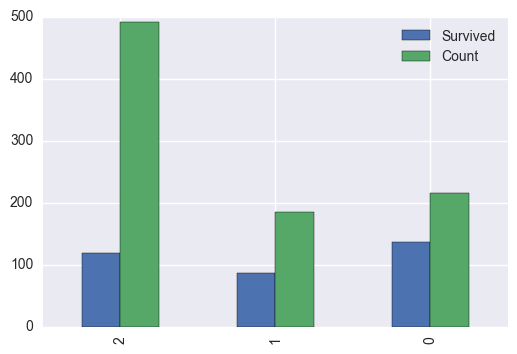

In [88]:
df[['Survived', 'Count']].plot.bar()

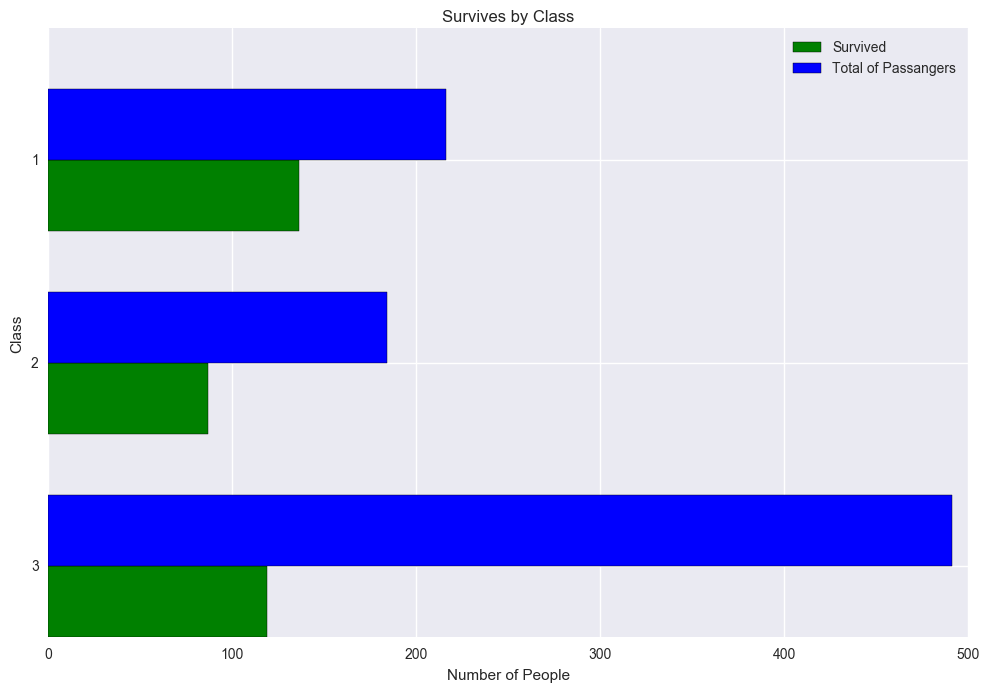

In [89]:
#Define o tamanho da figura
fig = plt.subplots(figsize=(10, 7))

#Define o tamanho da espécies
index = np.arange(3)
bar_width = 0.35

tick_list = list(df['Pclass'].values.flatten())

#Definindo as barras
rects1 = plt.barh(index, df['Survived'], bar_width, color='g', label='Survived')

rects2 = plt.barh(index + bar_width, df['Count'], bar_width, color='b', label='Total of Passangers')

#Definindo as legendas
plt.xlabel('Number of People')
plt.ylabel('Class')
plt.title('Survives by Class')
plt.yticks(index + bar_width, tick_list)
plt.legend()

plt.tight_layout()
plt.show()

O gráfico anterior demonstra que nível de classe possui correlação com a probabilidade de sobreviência, pois há uma forte desproporção entre os sobreviventes de cada nível, com preferência para as primeiras e segundas classes.

In [90]:
#level 0 (Embarked), 1 (Pclass), 2 (Cabin), 3 (Name)
#Por meio dos levels posso obervar diversas médias relevantes, como sobreviventes 
#e média de tarifa por classe, por embarque, e por cabine.
level = 0
df1 = grupo1.mean().groupby(level=level).sum().sort_values('Count', ascending=False).reset_index()
df1[['Embarked','Survived', 'Count']]

,Embarked,Survived,Count
0,S,217,644
1,C,93,168
2,Q,30,77
3,0,2,2


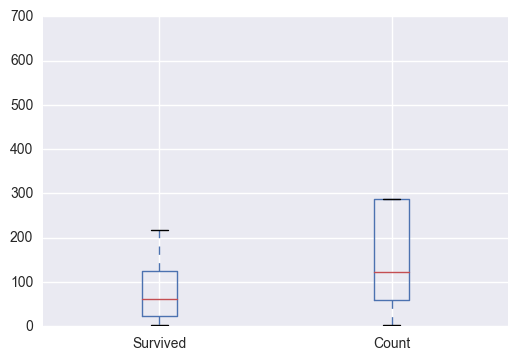

In [91]:
df1[['Survived', 'Count']].plot(kind='box')

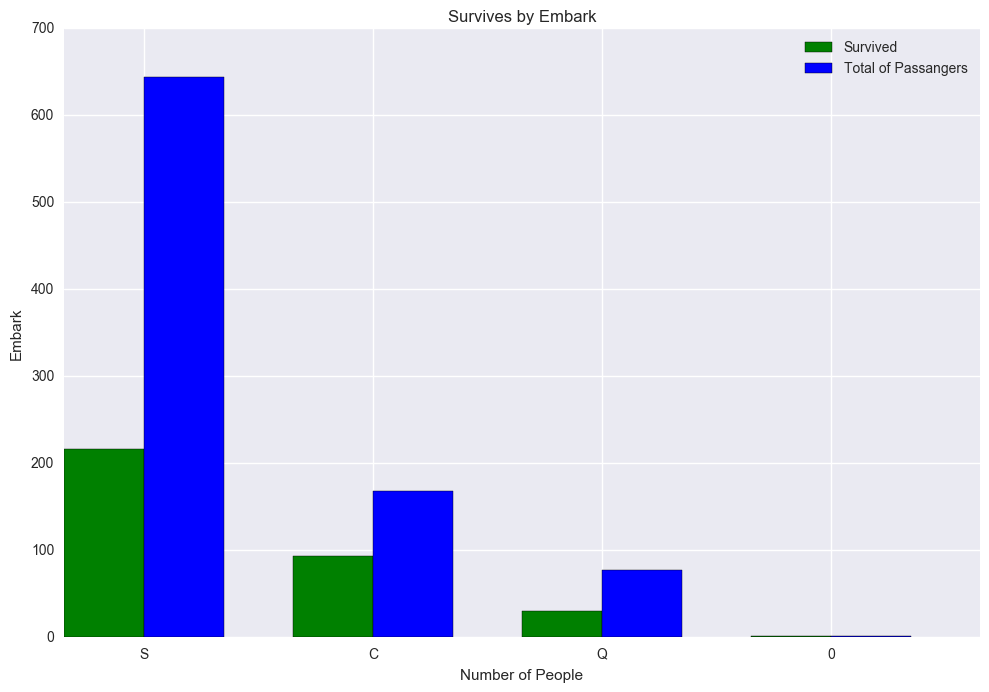

In [92]:
#Define o tamanho da figura
fig = plt.subplots(figsize=(10, 7))

#Define o tamanho das espécies
index = np.arange(4)
bar_width = 0.35

tick_list = list(df1['Embarked'].values.flatten())

#Definindo as barras
rects1 = plt.bar(index, df1['Survived'], bar_width, color='g', label='Survived')

rects2 = plt.bar(index + bar_width, df1['Count'], bar_width, color='b', label='Total of Passangers')

#Definindo as legendas
plt.xlabel('Number of People')
plt.ylabel('Embark')
plt.title('Survives by Embark')
plt.xticks(index + bar_width, tick_list)
plt.legend()

plt.tight_layout()
plt.show()

Dois **únicos** casos sem local de embarque, ambas sobreviveram.

In [93]:
titanic[titanic['Embarked'] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,0,1
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,0,1


In [94]:
#level 0 (Sex), 1 (Age), 2 (Name), 3(SibSp), 4 (Parch)
#Por meio dos levels posso obervar diversas médias relevantes, como sobreviventes 
#e média de tarifa por classe, por embarque, e por cabine.
level = 0
df2 = grupo2.sum().groupby(level=level).sum().sort_values('Count', ascending=False).reset_index()
df2

,Sex,Survived,Pclass,Fare,Count
0,male,109,1379,14727.2865,577
1,female,233,678,13966.6628,314


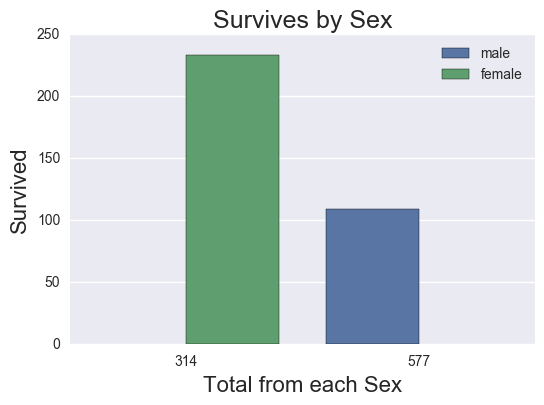

In [95]:
# use seaborn, 'hue' is the key option
# naming the chart (p in this case) allows you to set options on the chart
p = sns.barplot(x="Count", y="Survived", hue="Sex", data=df2)
sns.despine(left=True, bottom=True)

# set options on the chart
p.set_xlabel('Total from each Sex', fontsize=16)
p.set_ylabel('Survived', fontsize=16)
p.set_title("Survives by Sex", fontsize=18)

# plot the chart
plt.legend()
plt.show()

Mulheres foram privilegiadas na hora de sobreviver, apesar de serem em menor número, apresentaram um maior grau de sobrevivência.

In [96]:
#level 0 (Sex), 1 (Age), 2 (Name), 3(SibSp), 4 (Parch)
grupo2.mean().groupby(level=3).get_group(3)

Survived  \
Sex    Age  Name                                               SibSp Parch             
female 0.0  Lefebre, Miss. Ida                                 3     1             0   
            Lefebre, Miss. Jeannie                             3     1             0   
            Lefebre, Miss. Mathilde                            3     1             0   
       2.0  Skoog, Miss. Margit Elizabeth                      3     2             0   
       3.0  Palsson, Miss. Stina Viola                         3     1             0   
       8.0  Palsson, Miss. Torborg Danira                      3     1             0   
       9.0  Skoog, Miss. Mabel                                 3     2             0   
       23.0 Fortune, Miss. Mabel Helen                         3     2             1   
       24.0 Fortune, Miss. Alice Elizabeth                     3     2             1   
       30.0 Renouf, Mrs. Peter Henry (Lillian Jefferys)        3     0             1   
       33.0 Backstrom, Mrs. Karl Alfred (Maria Mathilda Gus... 3     0             1   
male   0.0  Lefebre, Master. Henry Forbes                      3     1             0   
       2.0  Palsson, Master. Gosta Leonard                     3     1             0   
       4.0  Skoog, Master. Harald                              3     2             0   
       10.0 Skoog, Master. Karl Thorsten                       3     2             0   
       19.0 Fortune, Mr. Charles Alexander                     3     2             0   

                                                                            Pclass  \
Sex    Age  Name                                               SibSp Parch           
female 0.0  Lefebre, Miss. Ida                                 3     1           3   
            Lefebre, Miss. Jeannie                             3     1           3   
            Lefebre, Miss. Mathilde                            3     1           3   
       2.0  Skoog, Miss. Margit Elizabeth                      3     2           3   
       3.0  Palsson, Miss. Stina Viola                         3     1           3   
       8.0  Palsson, Miss. Torborg Danira                      3     1           3   
       9.0  Skoog, Miss. Mabel                                 3     2           3   
       23.0 Fortune, Miss. Mabel Helen                         3     2           1   
       24.0 Fortune, Miss. Alice Elizabeth                     3     2           1   
       30.0 Renouf, Mrs. Peter Henry (Lillian Jefferys)        3     0           2   
       33.0 Backstrom, Mrs. Karl Alfred (Maria Mathilda Gus... 3     0           3   
male   0.0  Lefebre, Master. Henry Forbes                      3     1           3   
       2.0  Palsson, Master. Gosta Leonard                     3     1           3   
       4.0  Skoog, Master. Harald                              3     2           3   
       10.0 Skoog, Master. Karl Thorsten                       3     2           3   
       19.0 Fortune, Mr. Charles Alexander                     3     2           1   

                                                                                Fare  \
Sex    Age  Name                                               SibSp Parch             
female 0.0  Lefebre, Miss. Ida                                 3     1       25.4667   
            Lefebre, Miss. Jeannie                             3     1       25.4667   
            Lefebre, Miss. Mathilde                            3     1       25.4667   
       2.0  Skoog, Miss. Margit Elizabeth                      3     2       27.9000   
       3.0  Palsson, Miss. Stina Viola                         3     1       21.0750   
       8.0  Palsson, Miss. Torborg Danira                      3     1       21.0750   
       9.0  Skoog, Miss. Mabel                                 3     2       27.9000   
       23.0 Fortune, Miss. Mabel Helen                         3     2      263.0000   
       24.0 Fortune, Miss. Alice Elizabeth                    

As grandes famílias tiveram poucos sobreviventes, o mesmo valendo para as famílias com 4 e 3 integrantes. Somente em dois casos famílias com mais de 3 integrantes tiveram mais de 1 sobrevivente, na primeira classe duas moças se salvaram (Família **Fortune**, o rapaz morreu), e na terceira classe duas crianças, uma de 3 e outra de 5, da Família **Asplund**, se salvaram, nas demais famílias com mais de 3 integrantes no máximo 1 se salvou.
Família **Sage** (8 integrantes) e **Goodwin** (5 integrantes), sem sobreviventes, viajavam na terceira classe, porém pagaram uma tarifa cara considerando a média de cada classe.

In [97]:
#level 0 (Age), 1 (Sex), 2 (Name), 3(SibSp), 4 (Parch)
grupo2.mean().groupby(level=3).get_group(8)

Survived  Pclass  \
Sex    Age Name                              SibSp Parch                     
female 0.0 Sage, Miss. Constance Gladys      8     2             0       3   
           Sage, Miss. Dorothy Edith "Dolly" 8     2             0       3   
           Sage, Miss. Stella Anna           8     2             0       3   
male   0.0 Sage, Master. Thomas Henry        8     2             0       3   
           Sage, Mr. Douglas Bullen          8     2             0       3   
           Sage, Mr. Frederick               8     2             0       3   
           Sage, Mr. George John Jr          8     2             0       3   

                                                           Fare  Count  
Sex    Age Name                              SibSp Parch                
female 0.0 Sage, Miss. Constance Gladys      8     2      69.55      1  
           Sage, Miss. Dorothy Edith "Dolly" 8     2      69.55      1  
           Sage, Miss. Stella Anna           8     2      69.55      1  
male   0.0 Sage, Master. Thomas Henry        8     2      69.55      1  
           Sage, Mr. Douglas Bullen          8     2      69.55      1  
           Sage, Mr. Frederick               8     2      69.55      1  
           Sage, Mr. George John Jr          8     2      69.55      1

In [98]:
grupo2.mean().groupby(level=3).get_group(5)

Survived  Pclass  \
Sex    Age  Name                               SibSp Parch                     
female 16.0 Goodwin, Miss. Lillian Amy         5     2             0       3   
male   1.0  Goodwin, Master. Sidney Leonard    5     2             0       3   
       9.0  Goodwin, Master. Harold Victor     5     2             0       3   
       11.0 Goodwin, Master. William Frederick 5     2             0       3   
       14.0 Goodwin, Mr. Charles Edward        5     2             0       3   

                                                            Fare  Count  
Sex    Age  Name                               SibSp Parch               
female 16.0 Goodwin, Miss. Lillian Amy         5     2      46.9      1  
male   1.0  Goodwin, Master. Sidney Leonard    5     2      46.9      1  
       9.0  Goodwin, Master. Harold Victor     5     2      46.9      1  
       11.0 Goodwin, Master. William Frederick 5     2      46.9      1  
       14.0 Goodwin, Mr. Charles Edward        5     2      46.9      1

Analisando com mais detalhe conclui-se que o valor da tarifa é por **Ticket** e não por pessoa.

In [99]:
grupo3 = titanic.groupby(['SibSp'])
grupo3.get_group(8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
159,0,3,"Sage, Master. Thomas Henry",male,0.0,8,2,CA. 2343,69.55,0,S,1
180,0,3,"Sage, Miss. Constance Gladys",female,0.0,8,2,CA. 2343,69.55,0,S,1
201,0,3,"Sage, Mr. Frederick",male,0.0,8,2,CA. 2343,69.55,0,S,1
324,0,3,"Sage, Mr. George John Jr",male,0.0,8,2,CA. 2343,69.55,0,S,1
792,0,3,"Sage, Miss. Stella Anna",female,0.0,8,2,CA. 2343,69.55,0,S,1
846,0,3,"Sage, Mr. Douglas Bullen",male,0.0,8,2,CA. 2343,69.55,0,S,1
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,0.0,8,2,CA. 2343,69.55,0,S,1


# 3 - Incluindo dados no DataFrame para melhor análise

Desta forma, se quiser fazer uma análise de receita por Classe, Sexo ou qualquer outra variável, antes é necessário fazer um **agrupamento por Ticket para identificar quantas pessoas são englobadas por cada tarifa.**

In [100]:
#Criando um grupo para identificar tarifa por tickets.
grupo4 = titanic.groupby(['Ticket', 'Name'])

#Calculando a quantidade de pessoas por ticket.
person_per_ticket = grupo4.sum().groupby(level=0).sum().reset_index()

#Criei uma pd.DataFrame com os valores de pessoas por Ticket para mesclar com o DataFrame principal.
frame = person_per_ticket[['Ticket', 'Count']]

#Renomeie as colunas
frame.columns= ['Ticket', 'Count_Ticket']

#Mesclei os valores com a tabela original de Titanic, adicionando a coluna Count_Ticket
count_merged = titanic.merge(frame, on='Ticket', how='right')

count_merged.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count,Count_Ticket
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1


Ao agrupar os Tickets por contagens de pessoas foi possível observar que haviam novas grandes famílias que a coluna SibSP não havia indetificado corretamente. Foi o caso das famílias **Andersson**, **Lam**, **Panula**, **Skoog**, **Hickman** e **Rice**.

In [101]:
#Formula monstro para agrupar por Ticket a coluna Count_Ticket maior do que 5.
count_merged.groupby(['Ticket', 'Name']).mean()[count_merged.groupby(['Ticket', 'Name'])
                                                .mean()['Count_Ticket'] >= 5].sort_values(['Count_Ticket', 'Fare'], ascending=False)

Survived  \
Ticket       Name                                                           
CA. 2343     Sage, Master. Thomas Henry                                 0   
             Sage, Miss. Constance Gladys                               0   
             Sage, Miss. Dorothy Edith "Dolly"                          0   
             Sage, Miss. Stella Anna                                    0   
             Sage, Mr. Douglas Bullen                                   0   
             Sage, Mr. Frederick                                        0   
             Sage, Mr. George John Jr                                   0   
1601         Bing, Mr. Lee                                              1   
             Chip, Mr. Chang                                            1   
             Foo, Mr. Choong                                            1   
             Lam, Mr. Ali                                               1   
             Lam, Mr. Len                                               0   
             Lang, Mr. Fang                                             1   
             Ling, Mr. Lee                                              0   
347082       Andersson, Master. Sigvard Harald Elias                    0   
             Andersson, Miss. Ebba Iris Alfrida                         0   
             Andersson, Miss. Ellis Anna Maria                          0   
             Andersson, Miss. Ingeborg Constanzia                       0   
             Andersson, Miss. Sigrid Elisabeth                          0   
             Andersson, Mr. Anders Johan                                0   
             Andersson, Mrs. Anders Johan (Alfrida Konstanti...         0   
CA 2144      Goodwin, Master. Harold Victor                             0   
             Goodwin, Master. Sidney Leonard                            0   
             Goodwin, Master. William Frederick                         0   
             Goodwin, Miss. Lillian Amy                                 0   
             Goodwin, Mr. Charles Edward                                0   
             Goodwin, Mrs. Frederick (Augusta Tyler)                    0   
3101295      Panula, Master. Eino Viljami                               0   
             Panula, Master. Juha Niilo                                 0   
             Panula, Master. Urho Abraham                               0   
             Panula, Mr. Ernesti Arvid                                  0   
             Panula, Mr. Jaako Arnold                                   0   
             Panula, Mrs. Juha (Maria Emilia Ojala)                     0   
347088       Skoog, Master. Harald                                      0   
             Skoog, Master. Karl Thorsten                               0   
             Skoog, Miss. Mabel                                         0   
             Skoog, Miss. Margit Elizabeth                              0   
             Skoog, Mr. Wilhelm                                         0   
             Skoog, Mrs. William (Anna Bernhardina Karlsson)            0   
S.O.C. 14879 Davies, Mr. Charles Henry                                  0   
             Hickman, Mr. Leonard Mark                                  0   
             Hickman, Mr. Lewis                                         0   
             Hickman, Mr. Stanley George                                0   
             Hood, Mr. Ambrose Jr                                       0   
382652       Rice, Master. Arthur                                       0   
             Rice, Master. Eric                                         0   
             Rice, Master. Eugene                                       0   
             Rice, Master. George Hugh                                  0   
             Rice, Mrs. William (Margaret Norton)                       0   

                                                                 Pclass   Age  \
Ticket       Name                                       

Entretanto o veredito se manteve com relação aos poucos sobreviventes por grande família, com exceção da familia **Lam**, em que 5 de 7 sobreviveram.

In [102]:
count_merged.groupby(['Ticket']).sum()[count_merged.groupby(['Ticket'])
                                       .mean()['Count_Ticket'] >= 5][['Survived', 'Count']]

,Survived,Count
Ticket,,
1601,5,7
3101295,0,6
347082,0,7
347088,0,6
382652,0,5
CA 2144,0,6
CA. 2343,0,7
S.O.C. 14879,0,5


Agora que sabemos quantas pessoas havia em cada Ticket é possível concluir quanto foi a tarifa de cada pessoa.

In [103]:
#Adicionei uma coluna com o valo da tarifa por pessoa.
count_merged['Fare_Person']= pd.Series(count_merged['Fare']/count_merged['Count_Ticket'], index=count_merged.index)

#Mesclei com a DataFrame principal, incluindo Contagem por Ticket e Tarifa por Pessoa.
titanic = titanic.merge(count_merged[['Name', 'Count_Ticket', 'Fare_Person']], on='Name', how='right')

Possuindo a informação de quanto cada pessoa pagou por ticket é possível fazer a cruel comparação de quanto os sobreviventes pagaram contra os que não conseguiram sobreviver.

In [104]:
df3 = titanic.groupby('Survived').sum().reset_index()
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Count,Count_Ticket,Fare_Person
0,0,1390,12985.50,304,181,12142.7199,549,959,7424.604274
1,1,667,8219.67,162,159,16551.2294,342,634,8425.384776


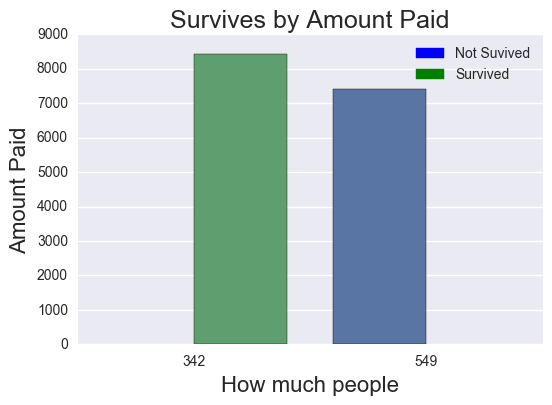

In [105]:
# use seaborn, 'hue' is the key option
# naming the chart (p in this case) allows you to set options on the chart
p = sns.barplot(x="Count", y="Fare_Person", hue="Fare_Person", data=df3)
sns.despine(left=True, bottom=True)

# set options on the chart
p.set_xlabel('How much people', fontsize=16)
p.set_ylabel('Amount Paid', fontsize=16)
p.set_title("Survives by Amount Paid", fontsize=18)

# plot the chart
blue_patch = mpatches.Patch(color='blue', label='Not Suvived')
green_patch = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[blue_patch, green_patch], loc='upper right')
plt.show()

O resultado do gráfico anterior mostra que as pessoas que sobreviveram, apesar de serem 62% das pessoas que não sobreviveram, e 38,4% do total de pessoas, em conjunto **pagaram um total de tarifa maior (aproximadamente mil dólares a mais) do que as pessoas que não sobreviveram.** Demonstrando uma forte influência econômica nas chaces de sobrevivência.

In [133]:
#Agruprei os dados por sexo e selecionei o feminino.
df4_female = titanic.groupby('Sex').get_group('female')
#Agruprei os dados por sobreviventes.
df4_survived = df4_female.groupby('Survived').get_group(1)
df4_not_survived = df4_female.groupby('Survived').get_group(0)
df4_survived.groupby('Pclass').sum()[['Survived','Fare_Person']]

,Survived,Fare_Person
Pclass,,
1,91,4363.956300
2,70,1031.004867
3,72,600.572417


In [136]:
df4_not_survived.groupby('Pclass').get_group(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count,Count_Ticket,Fare_Person
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,1,1,28.7125
297,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,1,4,37.8875
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,4,37.8875


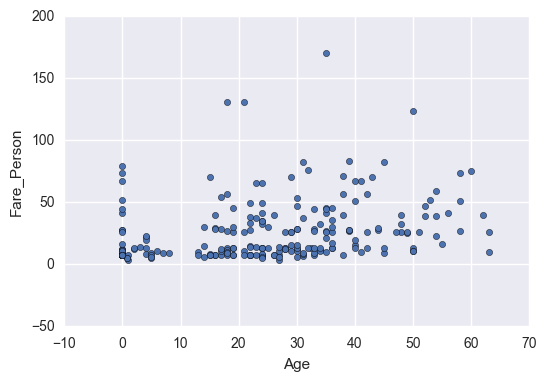

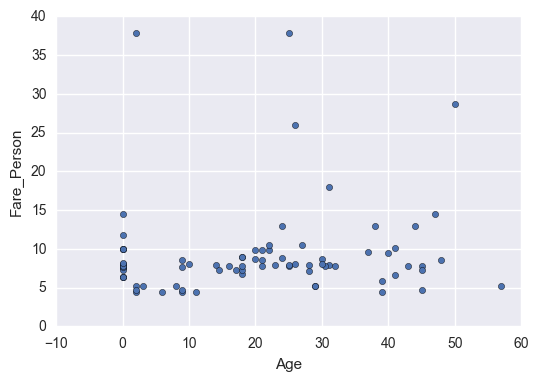

In [111]:
df4_survived.plot(x='Age', y='Fare_Person', kind='scatter')
df4_not_survived.plot(x='Age', y='Fare_Person', kind='scatter')

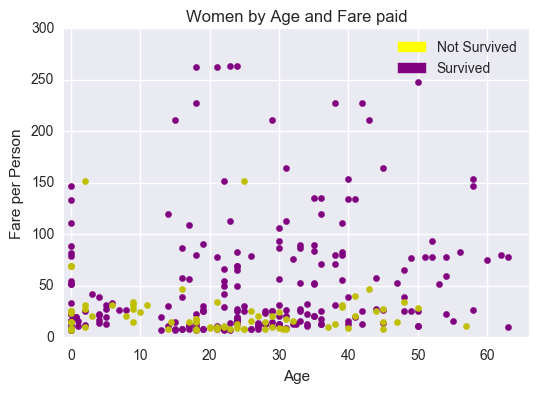

In [113]:
#Legendas do gráfico
plt.xlabel('Age')
plt.ylabel('Fare per Person')
plt.title('Women by Age and Fare paid')
red_patch = mpatches.Patch(color='yellow', label='Not Survived')
green_patch = mpatches.Patch(color='purple', label='Survived')
plt.legend(handles=[red_patch, green_patch], loc='upper right')


#Limites do gráfico
plt.xlim(xmin=-1, xmax=66)
plt.ylim(ymin=-1, ymax=300)

#Dados do gráfico
plt.scatter(df4_survived['Age'],df4_survived['Fare'], color='purple')
plt.scatter(df4_not_survived['Age'],df4_not_survived['Fare'], color='y')

O último gráfico mostra que dentro do grupo das mulheres, em regra, aquelas que menos sobreviveram foram as que haviam pago tarifas menores.

# 4 - Conclusão

A análise dos dados aponta para uma forte prevalência do grupo feminino e do grupo dos mais ricos entre os sobreviventes. Ao passo que grandes famílias foram penalisadas, principalmente por se concentrarem em níveis mais pobres do navio.

# 5 - Referências, sites visitados.
1 - https://discussions.udacity.com/t/share-dataframe-plots/37749/44<br/>
2 - http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot<br/>
3 - http://matplotlib.org/examples/index.html<br/>
4 - http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label<br/>
5 - http://pandas.pydata.org/pandas-docs/stable/cookbook.html<br/>
6 - http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html<br/>
7 - http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas<br/>
8 - https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/comments<br/>